<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A1：全连接神经网络 & Keras使用方法</h1>

## 0. 引言

这个教程主要介绍了使用Keras建立一个简单的全连接人工神经网络模型的基本工作流，希望通过这个教程能够帮助大家了解Keras中的一些基本概念。

Keras官网地址：https://keras.io/

## 1. 安装 Keras 3 和 Backend

You can install Keras from PyPI via:

``` pip install --upgrade keras ```

To use Keras 3, you will also need to install a backend framework – either JAX, TensorFlow, or PyTorch:

- JAX:

- ```pip install -U jax ```

- TensorFlow:

- ``` pip install tensorflow ```

- PyTorch:

- ``` pip3 install torch torchvision ```


## 2. 配置Backend

设置环境变量
``` 
export KERAS_BACKEND="jax"
```

或者在代码中设置
```
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
```

## 3. 加载必要的包和数据集

In [8]:
# 加载 Tensorboard 扩展，用于模型可视化
%load_ext tensorboard

# 设置 Keras 的 Backend。每次进行新的设置时，需要restart环境
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

# 导入 Keras 需要用到包
import keras
from datetime import datetime
import tensorboard

# 清理之前的log文件，以确保 Tensorboard 显示正确
!rm -rf ./logs/

## 4. 加载和审视数据集

In [10]:
from keras import datasets

(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### 画图的函数

在3x3网格上画出9个图片并且在图片下方标注正确的类别和预测的类别的函数

In [13]:
import matplotlib.pyplot as plt

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # 创建一个包含3x3个子图的图
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # 画图
        ax.imshow(images[i].reshape([28,28]), cmap='binary')

        # 展示正确的类别和预测的类别
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # 将图中的轴线去掉
        ax.set_xticks([])
        ax.set_yticks([])

### 画几个图片看看数据是不是对的

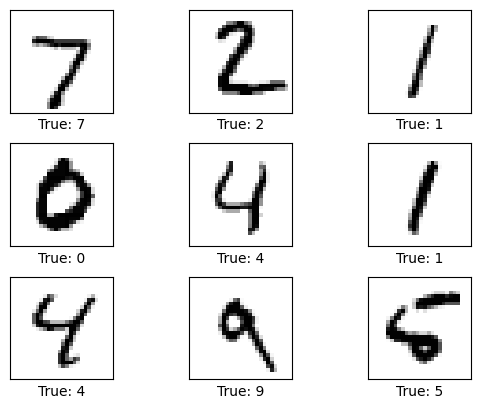

In [15]:
# 从测试数据集中取出前9个图片
images = x_test[0:9]

# 从测试数据集中取出前9个标签?
cls_true = y_test[0:9]

# 使用辅助函数将图片和标签画出来
plot_images(images=images, cls_true=cls_true)

## 5. 构建模型

In [17]:
from keras import Input
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential([
  Input(shape=(28, 28, ), batch_size=32),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model.fit(x_train, y_train, epochs=10, callbacks=[tensorboard_callback])
model.evaluate(x_test, y_test)
model.save("model.keras")

%tensorboard --logdir logs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8577 - loss: 0.4860
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.9571 - loss: 0.1452
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9685 - loss: 0.1063
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9725 - loss: 0.0860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.9764 - loss: 0.0746
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9816 - loss: 0.0593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9821 - loss: 0.0545
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9835 - loss: 0.0505
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9848 - loss: 0.0456
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9867 - loss: 0.0407
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.9761 - loss: 0.0843


## 6. 观察权重

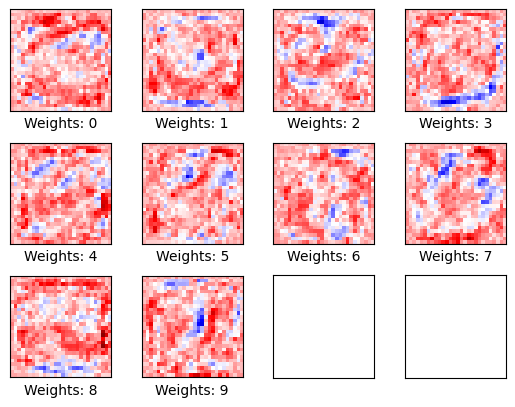

In [19]:
import numpy as np
import matplotlib.pyplot as plt

w = model.get_weights()
w = np.array(w[0])

w_min = np.min(w)
w_max = np.max(w)

# 建立一个包含3x4个子图的图形，最后两个子图没有被使用，因为一共只有10个数字
fig, axes = plt.subplots(3, 4)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    # 只使用前10个子图的权重值
    if i<10:
        # 取得第i个数字的权重值并且改变这个张量的形状，注意w的形状是img_size_flat x 10
        image = w[:, i].reshape(28,28)

        # 为每个子图设置标签
        ax.set_xlabel("Weights: {0}".format(i))

        # 画图
        ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

    # 将轴线从每个子图中删除
    ax.set_xticks([])
    ax.set_yticks([])